<a href="https://colab.research.google.com/github/Lildeer894/task_1/blob/main/Proyek_Analisis_Data_Yolan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset

- **Nama: Yolanda Sari S.**
- **Email: m119b4kx4541@bangkit.academy**
- **ID Dicoding: 9849858**

# Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh suhu terhadap jumlah rental sepeda?
- Apa pengaruh variabel cuaca terhadap jumlah rental sepeda?

# Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Wrangling

In [ ]:
from google.colab import files
uploaded = files.upload()

# Load dataset
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')
print(df_day.head())
print(df_hour.head())

Saving day.csv to day (2).csv
Saving hour.csv to hour (2).csv
Saving Readme.txt to Readme (2).txt
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82     

#Gathering Data

In [ ]:
# Deskripsi data harian dan per jam
print("Deskripsi Data Harian:")
print(day_data.describe())

print("Deskripsi Data Per Jam:")
print(hour_data.describe())


Deskripsi Data Harian:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std 

**Insight:**

- Distribusi jumlah rental pada data harian dan data per jam

# Assesing Data

In [ ]:
# Checking for missing Structure of the Datasets
print("Info Data Harian:")
day_data.info()

print("\nInfo Data Per Jam:")
hour_data.info()

# Checking for missing Values of Datasets
print("Missing Data pada Data Harian:")
print(day_data.isna().sum())

print("\nMissing Data pada Data Per Jam:")
print(hour_data.isna().sum())

# Checking for duplicates of Datasets
duplicates_day = day_data.duplicated().sum()
print(f"Jumlah duplikat di data harian: {duplicates_day}")

duplicates_hour = hour_data.duplicated().sum()
print(f"Jumlah duplikat di data per jam: {duplicates_hour}")


Info Data Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Info Data Per Jam:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379

**Insight:**

- Kolom dengan tipe data yang tidak sesuai
- Jumlah missing values
- Jumlah dari data duplikat

# Cleaning Data

In [ ]:
# Definisikan kolom yang akan diubah menjadi datetime dan kategori
datetime_columns = ['dteday']
category_columns = ['season', 'weathersit']

# Mengubah kolom ke tipe datetime
for column in datetime_columns:
    day_data[column] = pd.to_datetime(day_data[column])

# Mengubah kolom ke tipe kategori
for column in category_columns:
    day_data[column] = day_data[column].astype('category')

print(day_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(2), datetime64

**Insight:**

- Mengubah tipe data pada kolom dteday menjadi datetime

# Exploratory Data Analysis (EDA)

In [ ]:
# Menampilkan statistik deskriptif dari dataset
day_data_description = day_data.describe(include="all")
hour_data_description = hour_data.describe(include="all")

print("Deskripsi Dataset Day:")
print(day_data_description)

print("\nDeskripsi Dataset Hour:")
print(hour_data_description)


Deskripsi Dataset Day:
           instant               dteday  season          yr        mnth  \
count   731.000000                  731   731.0  731.000000  731.000000   
unique         NaN                  NaN     4.0         NaN         NaN   
top            NaN                  NaN     3.0         NaN         NaN   
freq           NaN                  NaN   188.0         NaN         NaN   
mean    366.000000  2012-01-01 00:00:00     NaN    0.500684    6.519836   
min       1.000000  2011-01-01 00:00:00     NaN    0.000000    1.000000   
25%     183.500000  2011-07-02 12:00:00     NaN    0.000000    4.000000   
50%     366.000000  2012-01-01 00:00:00     NaN    1.000000    7.000000   
75%     548.500000  2012-07-01 12:00:00     NaN    1.000000   10.000000   
max     731.000000  2012-12-31 00:00:00     NaN    1.000000   12.000000   
std     211.165812                  NaN     NaN    0.500342    3.451913   

           holiday     weekday  workingday  weathersit        temp  \
count 

Deskripsi Statistik:
           instant               dteday  season          yr        mnth  \
count   731.000000                  731   731.0  731.000000  731.000000   
unique         NaN                  NaN     4.0         NaN         NaN   
top            NaN                  NaN     3.0         NaN         NaN   
freq           NaN                  NaN   188.0         NaN         NaN   
mean    366.000000  2012-01-01 00:00:00     NaN    0.500684    6.519836   
min       1.000000  2011-01-01 00:00:00     NaN    0.000000    1.000000   
25%     183.500000  2011-07-02 12:00:00     NaN    0.000000    4.000000   
50%     366.000000  2012-01-01 00:00:00     NaN    1.000000    7.000000   
75%     548.500000  2012-07-01 12:00:00     NaN    1.000000   10.000000   
max     731.000000  2012-12-31 00:00:00     NaN    1.000000   12.000000   
std     211.165812                  NaN     NaN    0.500342    3.451913   

           holiday     weekday  workingday  weathersit        temp  \
count   

<ipython-input-38-6db4ee1786c4>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_cnt = day_data[['weathersit', 'cnt']].groupby('weathersit').agg({'cnt': 'mean'}).reset_index()


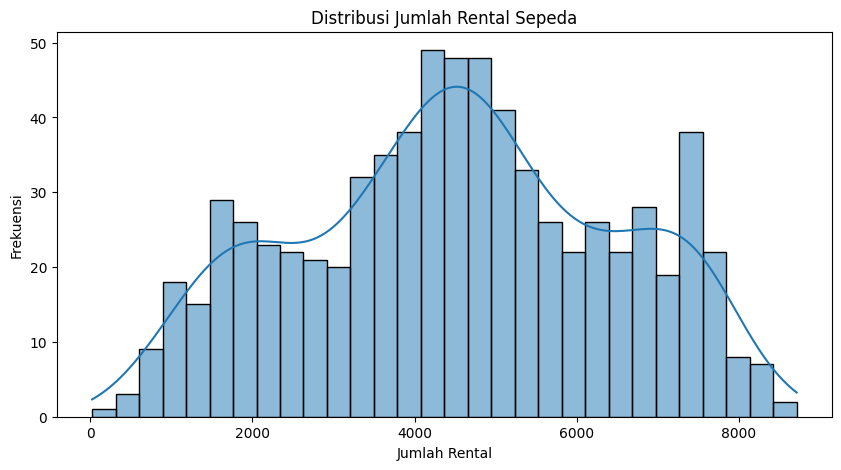

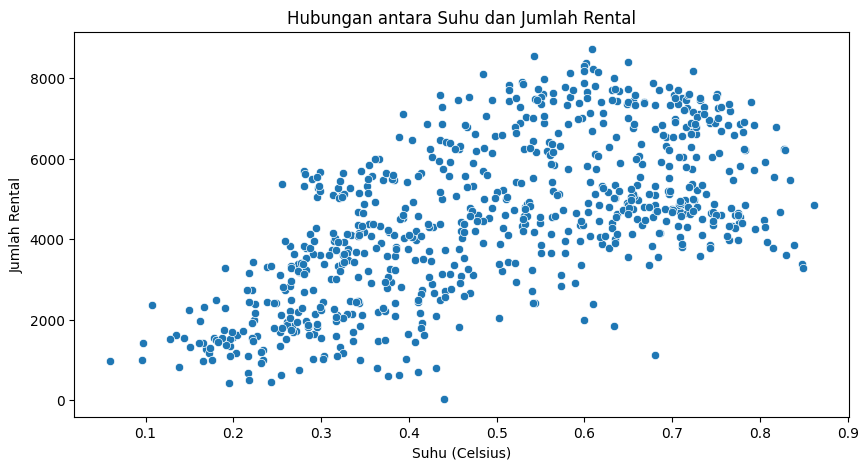

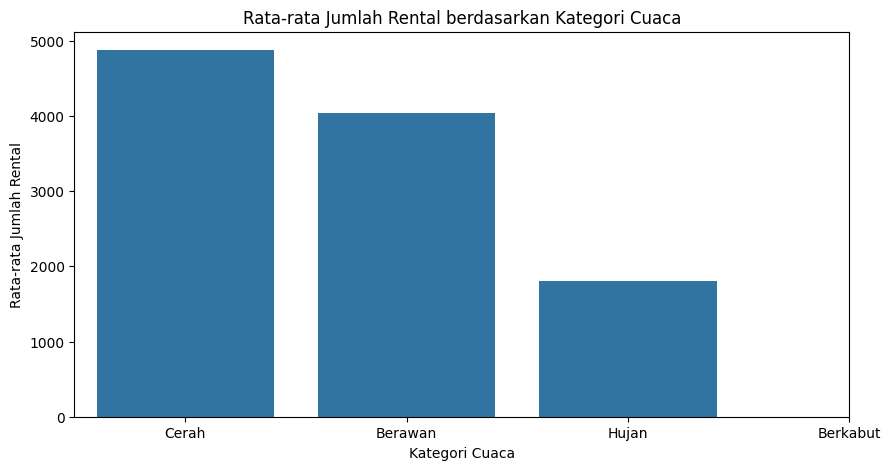

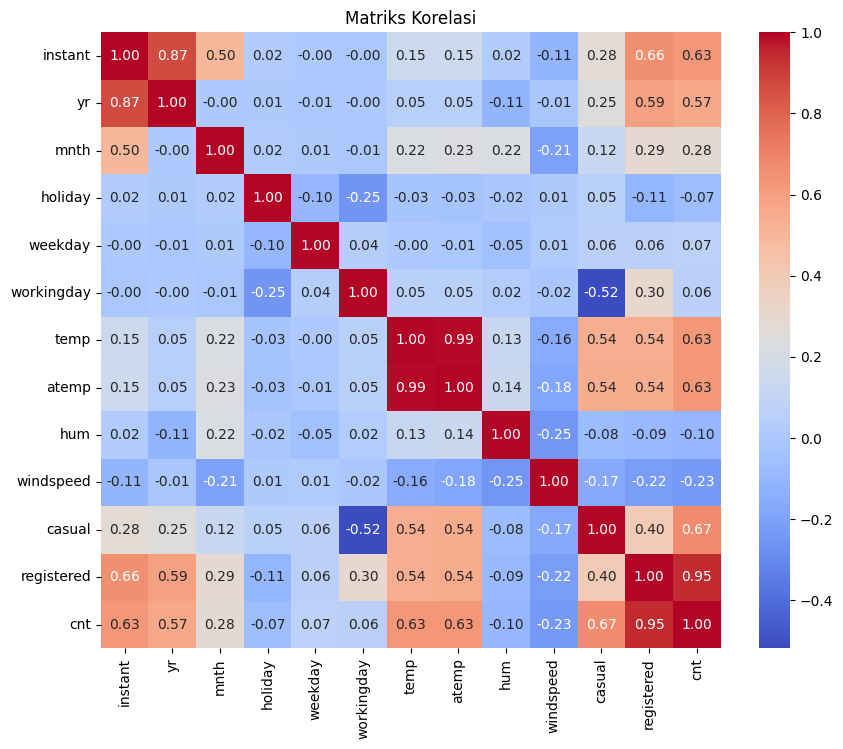

In [ ]:
# Deskripsi Statistik
print("Deskripsi Statistik:")
print(day_data.describe(include='all'))

# Menggabungkan data untuk analisis hubungan
temp_cnt = day_data[['temp', 'cnt']]
weather_cnt = day_data[['weathersit', 'cnt']].groupby('weathersit').agg({'cnt': 'mean'}).reset_index()

# Visualisasi distribusi 'cnt'
plt.figure(figsize=(10, 5))
sns.histplot(day_data['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Rental Sepeda')
plt.xlabel('Jumlah Rental')
plt.ylabel('Frekuensi')
plt.show()

# Hubungan antara 'temp' dan 'cnt'
plt.figure(figsize=(10, 5))
sns.scatterplot(x='temp', y='cnt', data=temp_cnt)
plt.title('Hubungan antara Suhu dan Jumlah Rental')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Rental')
plt.show()

# Hubungan antara 'weathersit' dan 'cnt'
plt.figure(figsize=(10, 5))
sns.barplot(x='weathersit', y='cnt', data=weather_cnt)
plt.title('Rata-rata Jumlah Rental berdasarkan Kategori Cuaca')
plt.xlabel('Kategori Cuaca')
plt.ylabel('Rata-rata Jumlah Rental')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Berawan', 'Hujan', 'Berkabut'])
plt.show()

# Matriks Korelasi
numeric_columns = day_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()


**Insight**

- Dari plot hubungan antara 'weathersit' dan 'cnt' didapatkan hubungan positif, dimana ketika suhu meningkat maka jumlah rental cenderung meningkat (sekitar 0.6 hingga 0.8 dalam skala normalisasi). Hal ini menunjukkan bahwa ketika cuaca yang lebih hangat akan menarik lebih banyak penyewa sepeda (5000 hingga 6000 penyewa).
- Cuaca mempengaruhi permintaan rental, dimana ketika cuaca cerah maka jumlah rental lebih tinggi dibandingkan dengan hari hujan atau berkabut.
- Dari histogram, terlihat bahwa sebagian besar (data hari) memiliki jumlah rental yang berkisar antara 1000 hingga 5000. Namun, ada ekor panjang di sisi kanan, yang menunjukkan adanya hari-hari dengan jumlah rental yang sangat tinggi, hingga sekitar 8000 sepeda. Hal ini menunjukkan bahwa walaupun ada hari dengan jumlah rental sangat tinggi (8000 sepeda), sebagian besar hari memiliki permintaan rental yang moderat (1000 hingga 5000).
- Dari matriks korelasi menunjukan suhu merupakan faktor lingkungan utama yang mempengaruhi jumlah rental, sedangkan kelembapan dan angin memiliki dampak yang lebih kecil tetapi tetap signifikan.

# Visualization & Explanatory Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


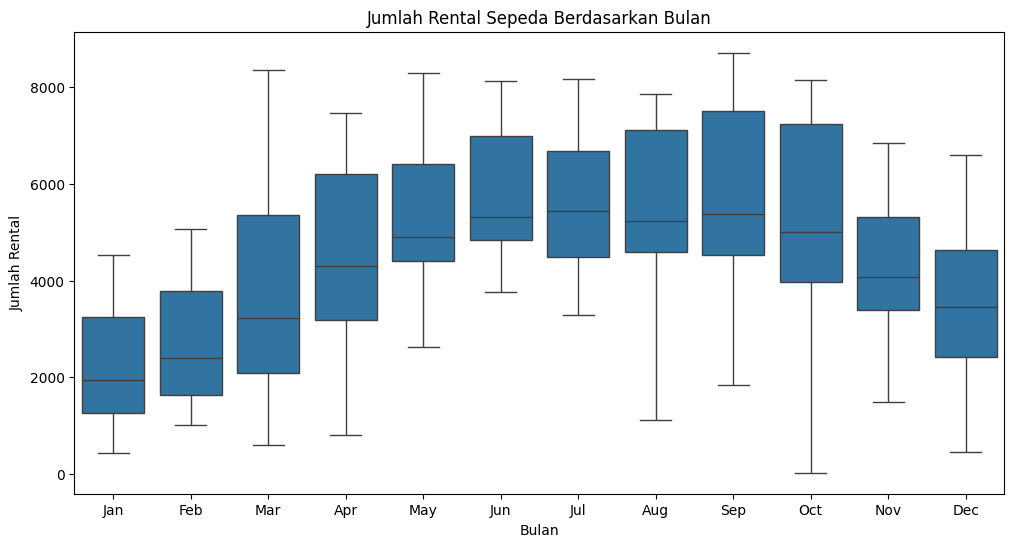

<ipython-input-39-7da8f4598ea5>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=day_data, ci=None)


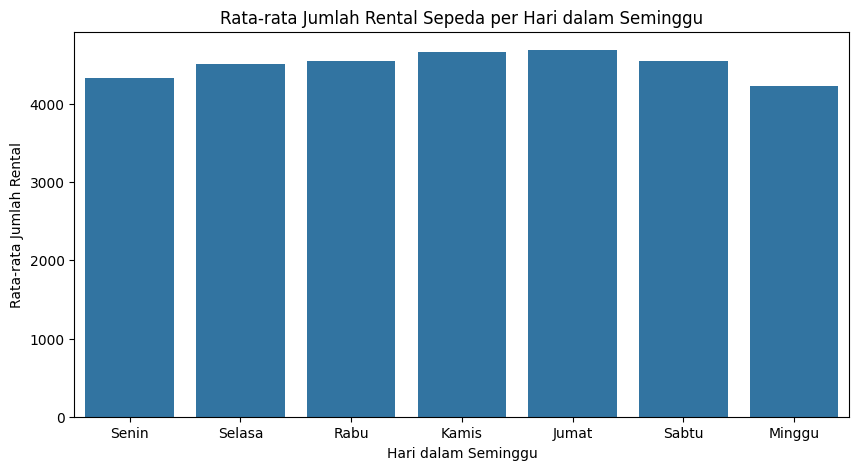

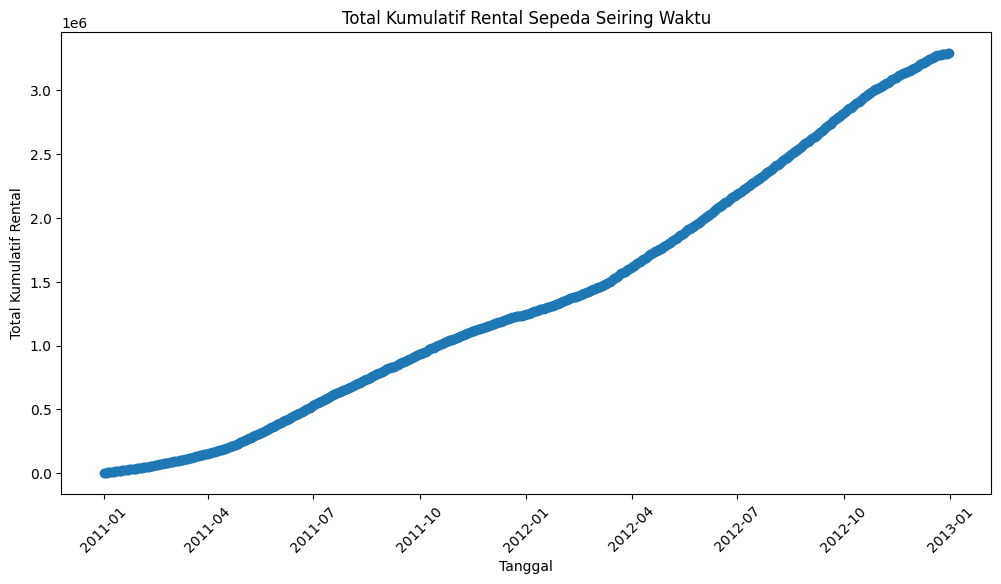

In [ ]:
# Menambahkan kolom bulan dan hari dalam seminggu
day_data['month'] = day_data['dteday'].dt.month
day_data['weekday'] = day_data['dteday'].dt.weekday  # 0 = Senin, 6 = Minggu

#Visualisasi berdasarkan Month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='cnt', data=day_data)
plt.title('Jumlah Rental Sepeda Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Rental')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

#Visualisasi berdasarkan Hari dalam Seminggu
plt.figure(figsize=(10, 5))
sns.barplot(x='weekday', y='cnt', data=day_data, ci=None)
plt.title('Rata-rata Jumlah Rental Sepeda per Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Jumlah Rental')
plt.xticks(ticks=range(7), labels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.show()

#Visualisasi Kumulatif Rental Sepeda
day_data['cumulative_cnt'] = day_data['cnt'].cumsum()
plt.figure(figsize=(12, 6))
plt.plot(day_data['dteday'], day_data['cumulative_cnt'], marker='o', linestyle='-')
plt.title('Total Kumulatif Rental Sepeda Seiring Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Total Kumulatif Rental')
plt.xticks(rotation=45)
plt.show()


**Pertanyaan 1: Bagaimana suhu mempengaruhi jumlah rental sepeda?**

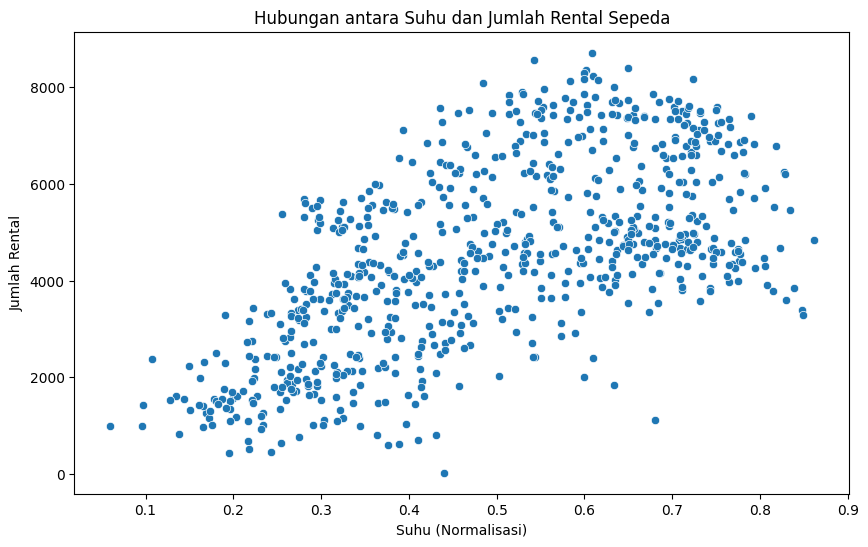

Korelasi antara suhu dan jumlah rental: 0.6274940090334918


In [ ]:
# Menghitung dan memvisualisasikan hubungan suhu dengan jumlah rental
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_data)
plt.title('Hubungan antara Suhu dan Jumlah Rental Sepeda')
plt.xlabel('Suhu (Normalisasi)')
plt.ylabel('Jumlah Rental')
plt.show()

# Menghitung korelasi
correlation_temp_cnt = day_data['temp'].corr(day_data['cnt'])
print(f"Korelasi antara suhu dan jumlah rental: {correlation_temp_cnt}")


**Pertanyaan 2: Apa pengaruh variabel cuaca terhadap jumlah rental sepeda?**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


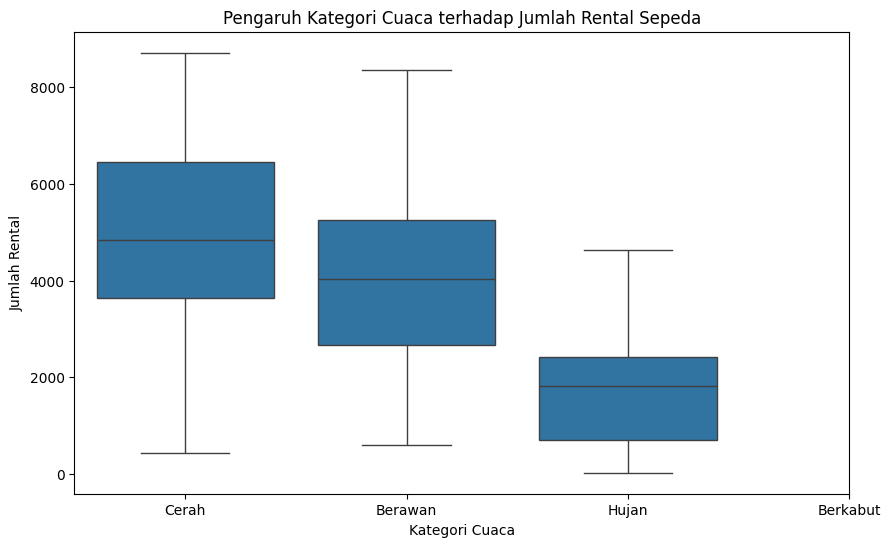

weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64


<ipython-input-43-6f4b0c0bafa7>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rental_per_weathersit = day_data.groupby('weathersit')['cnt'].mean()


In [ ]:
# Visualisasi pengaruh kategori cuaca
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_data)
plt.title('Pengaruh Kategori Cuaca terhadap Jumlah Rental Sepeda')
plt.xlabel('Kategori Cuaca')
plt.ylabel('Jumlah Rental')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Berawan', 'Hujan', 'Berkabut'])
plt.show()

# Menghitung rata-rata jumlah rental per kategori cuaca
avg_rental_per_weathersit = day_data.groupby('weathersit')['cnt'].mean()
print(avg_rental_per_weathersit)


**Insight:**

- Pertanyaan 1: Terdapat hubungan positif yang signifikan antara suhu dan jumlah retal sepeda dengan korelasi sekitar 0.63 yang menunjukkan bahwa peningkatan suhu akan meningkatkan jumlah rental pula.
- Pertanyaan 2: Variabel cuaca juga berppengaruh signifikan pada jumlah rental, dengan rata-rata rental tertinggi terjadi pada hari cerah.

#Analisia Lanjutan (Opsional)

# Conclusion

- Conclusion 1: Peningkatan suhu acenderung meningkatkan permintaan rental yang berarti bahwa cuaca yang lebih hangat menarik banyak pengguna untuk menyewa sepeda.
- Conclusion 2: Pengguna sepeda akan meningkat ketika hari cerah dan menurun saat hari hujan atau berkabut.


In [ ]:
all_df = pd.concat([df_day, df_hour], ignore_index=True)
all_df.to_csv('all_data.csv', index=False)

In [ ]:
from google.colab import files
files.download('all_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>